In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from ML2_lib import valid


In [11]:
trial_num = 100 #試行回数
result_gauss = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_gauss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
check_k_num = 50 # 分割数　1 ~ check_k_num
rng = np.random.default_rng()
w_star = 1
X_mean = 5
X_var = 2
X_test = rng.normal(loc=X_mean,size=10,scale=X_var)
Y_test = noise.Gauss(sigma=2.2,dim=X_test.shape[0],n=1).generate() + X_test


for _ in tqdm(range(trial_num)):


    w_per_trial = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく
    a = 0.01 # 学習率
    c = 5 # wの初期値がとりうる範囲
    n = 500 # データセットのサンプル数
    b = 2.2 # ノイズの分散
    # 初期値wの決定
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,check_k_num+1):
        core_store = []
        model_store = []
        valid_loss_store = []



        son = loss.LinearQuadraticLoss()
        for _ in range(k):
            # nがデータセットのサンプル数、train_numはその半分
            train_num = n // 2
            # core_num は　k分割した後のサンプル数、
            core_num = train_num  // k
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]

            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            # :TODO fix axis
            model_store.append(np.mean(core.wstore))


        # ここまでで学習は終了,モデルの候補がk個ある
        # ここからモデルの選択
        valid_num = n // 2
        rng = np.random.default_rng()
        X = rng.normal(loc=X_mean,size=valid_num,scale=X_var)
        Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
        tmp_loss = []

        # for文を使っているので要修正
        for i in range(k):
            for j in range(k):
                core_num = valid_num // k
                try:
                    tmp_loss.append(son.f(Y[j:j+core_num],X[j:j+core_num],model_store[i]))
                except:
                    raise ValueError()
            valid_loss_store.append(valid.median_of_means(seq=np.array(tmp_loss),n_blocks=3))

        index = np.argmin(valid_loss_store)
        w_rv = model_store[index]
        loss_k = np.mean(son.f(y=Y_test,x=X_test,w=w_rv))
        w_per_trial.append(w_rv)
        loss_store.append(loss_k)

    result_gauss.append(np.array(w_per_trial))
    result_loss_gauss.append(np.array(loss_store))


result_gauss = np.array(result_gauss)
result_loss_gauss = np.array(result_loss_gauss)






  0%|          | 0/100 [00:00<?, ?it/s]

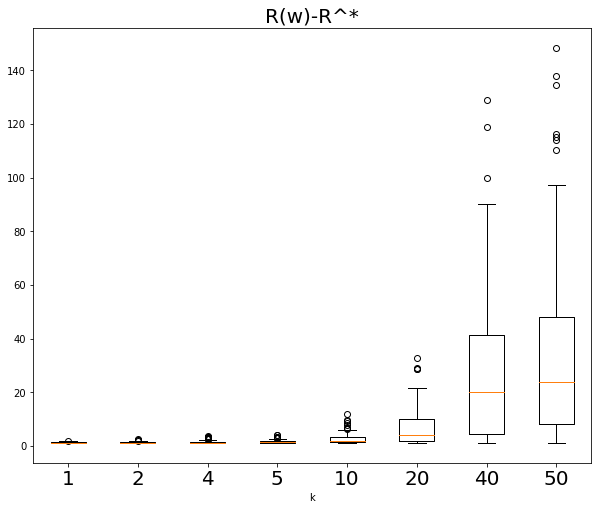

In [12]:
columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k')

plt.show()

In [13]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19,39,49]],columns=columns)

In [14]:
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.369548,1.402560,1.620872,1.657567,2.801230,7.079564,27.120287,34.797983
std,0.162014,0.267529,0.616808,0.648367,2.098405,6.871714,26.939922,35.412474
min,1.172326,1.172355,1.172286,1.172277,1.172278,1.175945,1.172604,1.175376
25%,1.223436,1.207921,1.228937,1.232906,1.390491,1.970402,4.604303,8.214115
50%,1.325751,1.298579,1.318748,1.389846,1.928877,4.311540,20.351805,24.077214
75%,1.471953,1.529148,1.726868,1.793334,3.390172,10.182181,41.297818,48.214873
max,1.914905,2.626126,3.640168,4.138036,11.984127,32.858111,128.837422,148.447835


In [28]:
# lognormal

trial_num = 100 #試行回数
result_log_normal = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_log_normal = [] # 過剰期待損失の最終結果　トライアル数*分割数k
check_k_num = 50 # 分割数　1 ~ check_k_num
rng = np.random.default_rng()
w_star = 1
X_mean = 5
X_var = 2
X_test = rng.normal(loc=X_mean,size=10,scale=X_var)
Y_test = noise.LogNormal(sigma=1.75,dim=X_test.shape[0],n=1).generate() + X_test


for _ in tqdm(range(trial_num)):


    w_per_trial = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく
    a = 0.01 # 学習率
    c = 5 # wの初期値がとりうる範囲
    n = 500 # データセットのサンプル数
    b = 1.75 # ノイズの分散
    # 初期値wの決定
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,check_k_num+1):
        core_store = []
        model_store = []
        valid_loss_store = []



        son = loss.LinearQuadraticLoss()
        for _ in range(k):
            # nがデータセットのサンプル数、train_numはその半分
            train_num = n // 2
            # core_num は　k分割した後のサンプル数、
            core_num = train_num  // k
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.LogNormal(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]

            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            # 平均のaxis　要修正
            model_store.append(np.mean(core.wstore))


        # ここまでで学習は終了,モデルの候補がk個ある
        # ここからモデルの選択
        valid_num = n // 2
        rng = np.random.default_rng()
        X = rng.normal(loc=X_mean,size=valid_num,scale=X_var)
        Y = noise.LogNormal(sigma=b,dim=X.shape[0],n=1).generate() + X
        tmp_loss = []
        # for文を使っているので要修正
        for i in range(k):
            for j in range(k):
                core_num = valid_num // k
                tmp_loss.append(son.f(Y[j:j+core_num],X[j:j+core_num],model_store[i]))
            valid_loss_store.append(valid.median_of_means(seq=np.array(tmp_loss),n_blocks=3))

        index = np.argmin(valid_loss_store)
        w_rv = model_store[index]
        loss_k = np.mean(son.f(y=Y_test,x=X_test,w=w_rv))
        w_per_trial.append(w_rv)
        loss_store.append(loss_k)

    result_log_normal.append(np.array(w_per_trial))
    result_loss_log_normal.append(np.array(loss_store))


result_log_normal = np.array(result_log_normal)
result_loss_log_normal = np.array(result_loss_log_normal)






  0%|          | 0/100 [00:00<?, ?it/s]

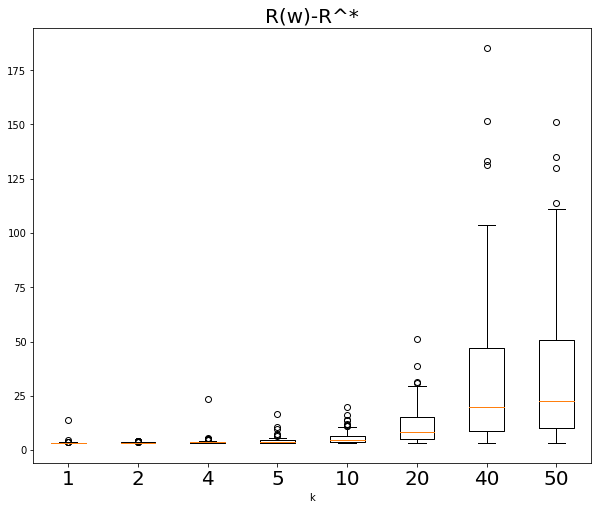

In [29]:
columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_log_normal[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k')

plt.show()

In [30]:
df = pd.DataFrame(result_loss_log_normal[:,[0,1,3,4,9,19,39,49]],columns=columns)

In [31]:
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.464605,3.431417,3.869461,4.167666,5.578670,11.244074,32.649999,35.109701
std,1.075337,0.238720,2.067207,1.755287,3.084202,8.797445,34.375195,33.951872
min,3.215535,3.215542,3.215792,3.215533,3.215645,3.216792,3.221393,3.217924
25%,3.229415,3.251903,3.320700,3.262464,3.469643,5.008199,8.640500,10.194757
50%,3.312553,3.332936,3.490507,3.535188,4.429623,8.210417,19.996094,22.381582
75%,3.411900,3.495593,3.760599,4.436662,6.410817,15.019655,47.051727,50.742452
max,13.930227,4.202917,23.693336,16.507726,19.877417,51.214403,185.388452,150.954887


,1,2,4,5,10,20,40,50
0,13.930227,3.220231,3.223476,3.217094,3.215645,13.651132,7.114574,26.853048
1,3.397638,3.320893,3.624154,3.433366,4.246777,7.683009,3.956613,4.700743
2,3.236547,3.249476,3.235602,3.248618,5.381383,6.611605,21.632794,29.165660
3,3.218784,3.292132,3.249106,3.304575,3.578829,3.311748,5.070103,3.805886
4,3.767854,3.478013,4.949883,6.281518,13.997195,5.218760,43.706543,110.371897
